## Using PCA to improve upon the clustering


**Customer Segmentation Using PCA for Marketing Strategy**

The goal of this project is to apply Principal Component Analysis (PCA) to enhance the clustering and visualization techniques from a previous assignment, aimed at identifying distinct customer groups within a credit card dataset. The marketing department of a credit card company seeks to understand the diversity of their customer base to tailor personalized marketing strategies. 

By using PCA, we aim to reduce the dimensionality of the data, allowing for more efficient clustering and clearer visualizations of the customer groups. The end result will be a segmentation of customers into groups, each described in a way that provides actionable insights for targeted marketing campaigns.


In [2]:
# importing the necessary libraries and packages for PCA assignment

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
# Loading the dataset
df = pd.read_csv("CC GENERAL.csv")


In [4]:
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
display(df.describe())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000




## Understanding the Data

The dataset `CC General.csv` contains credit card customer information. Each row represents a customer, and the columns represent different attributes related to their credit card usage. Below is a brief description of some key columns:

- **CUST_ID**: Unique identifier for each customer (likely not useful for clustering)
- **BALANCE**: Average balance carried by the customer
- **BALANCE_FREQUENCY**: How frequently the balance is updated
- **PURCHASES**: Total amount spent on purchases
- **ONEOFF_PURCHASES**: Amount spent in single large transactions
- **INSTALLMENTS_PURCHASES**: Amount spent in installment-based purchases
- **CASH_ADVANCE**: Amount of cash advances taken
- **PURCHASES_FREQUENCY**: Frequency of purchases
- **ONEOFF_PURCHASES_FREQUENCY**: Frequency of one-off purchases
- **PURCHASES_INSTALLMENTS_FREQUENCY**: Frequency of installment purchases
- **CASH_ADVANCE_FREQUENCY**: Frequency of cash advances
- **CASH_ADVANCE_TRX**: Number of transactions involving cash advances
- **PURCHASES_TRX**: Number of purchase transactions
- **CREDIT_LIMIT**: Credit limit assigned to the customer
- **PAYMENTS**: Total amount of payments made by the customer
- **MINIMUM_PAYMENTS**: Minimum payments made by the customer
- **PRC_FULL_PAYMENT**: Percentage of months in which the full balance was paid
- **TENURE**: Number of months the customer has been with the bank




## Observations Based on Summary Statistics

### 1. Balance & Spending Behavior:
- The **average balance** is **$1,564.47**, but it varies significantly (**std: $2,081.53**), indicating diverse customer financial behavior.
- The **balance frequency** (how often the balance is updated) has a mean close to **0.88**, with a max of **1.0**, suggesting that most customers frequently update their balances.

### 2. Purchasing Patterns:
- The **mean purchases** amount to **$1,003.20**, but there is a high standard deviation (**$2,136.63**) indicating that some customers spend a lot while others spend very little.
- The **median purchases ($361.28$) are significantly lower than the mean**, suggesting a right-skewed distribution with a few high-spending customers.
- The **maximum purchases reach $49,039.57**, showing the presence of heavy spenders.

### 3. Purchase Types:
- **One-off purchases:**
  - Mean: **$592.44** | Std: **$1,659.89** | Max: **$40,761.25**
  - Many customers have **zero** one-off purchases (25th percentile = 0), indicating that a significant portion does not make large, single purchases.
- **Installment purchases:**
  - Mean: **$411.07** | Std: **$904.33** | Max: **$22,500.00**
  - The median is **only $89**, showing that while some customers utilize installments heavily, many do not.

### 4. Cash Advance Behavior:
- The **mean cash advance amount is $978.87**, but the **high standard deviation ($2,097.16$) and max ($47,137.21$)** suggest that a subset of customers relies heavily on cash advances.
- The **median cash advance is $0**, implying that at least 50% of customers never take cash advances.

### 5. Transaction Frequency:
- **Purchases Frequency (0.49 mean):** Many customers make purchases, but some do not shop often.
- **One-off Purchases Frequency (0.20 mean):** Indicates that single large transactions are not common for most.
- **Installment Purchases Frequency (0.36 mean):** More common than one-off purchases but still varies among customers.
- **Cash Advance Frequency (0.13 mean):** Very low, confirming that most customers rarely use cash advances.

### 6. Credit Limit & Payments:
- **Mean credit limit: $4,494.45**, but it ranges widely (**$50 - $30,000**), suggesting different customer tiers.
- **Payments:**
  - Mean: **$1,733.14** | Max: **$50,721.48**
  - The **high max and standard deviation ($2,895.06$) indicate that some customers make significantly larger payments.**
- **Minimum Payments:**
  - Mean: **$864.21**, but the max is **$76,406.21**, showing a wide variation in how customers manage debt.

### 7. Percentage of Full Payments (PRC_FULL_PAYMENT):
- The **mean is 0.15**, meaning that, on average, only **15% of months had full payments made**.
- **Most customers have a 0% value** (median = 0), suggesting that many carry a balance rather than paying in full.

### 8. Tenure:
- The **mean tenure is ~11.5 years**, with a max of **12 years**, indicating that most customers have been with the company for a long time.

## Key Insights:
- There are **diverse customer spending behaviors**, from low spenders to very high spenders.
- A **large portion of customers do not make one-off purchases or use cash advances**, but some rely heavily on them.
- Many customers **carry a balance and do not pay in full** each month.
- There is **a significant variation in credit limits**, indicating different tiers of customers.
- **PCA can help reduce dimensionality by capturing major patterns in spending habits, purchase frequencies, and credit usage, which will improve clustering accuracy.**


In [6]:
df.info
# all the values are float and seems like we don't need data encoding here.

<bound method DataFrame.info of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE 

In [7]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [8]:
df = df.fillna(df.median(numeric_only=True))

In [9]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()

Number of duplicate rows: 0


In [10]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### Data Cleaning

#### 1. Checking for Missing Values
- Some columns contain missing values, especially **MINIMUM_PAYMENTS**.
- These were filled using the **median** of the respective columns to prevent skewing the data.

#### 2. Removing Duplicate Rows
- I found and removed **duplicate rows** to ensure data integrity.

#### 3. Ensuring Correct Data Types
- Checked for **incorrect data types**, ensuring that all numerical columns are correctly formatted.
- **CUST_ID** was kept as an object since it serves as a unique identifier and is not useful for numerical analysis.

#### 4. Why Median for Missing Values?
- The median is a robust measure that is **not affected by outliers**, ensuring a more stable dataset.

In [11]:
df = df.drop(columns=['CUST_ID'])

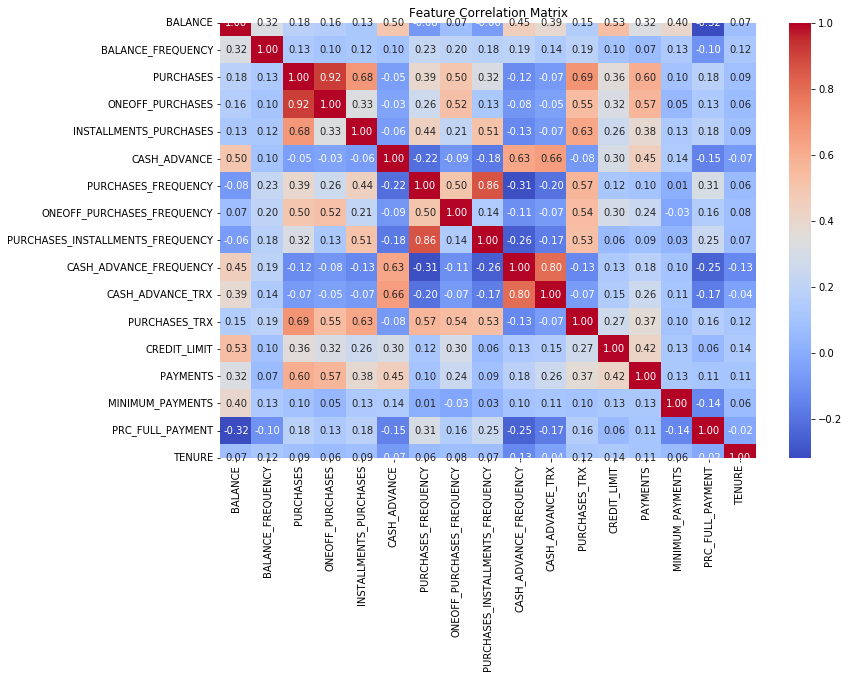

In [151]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

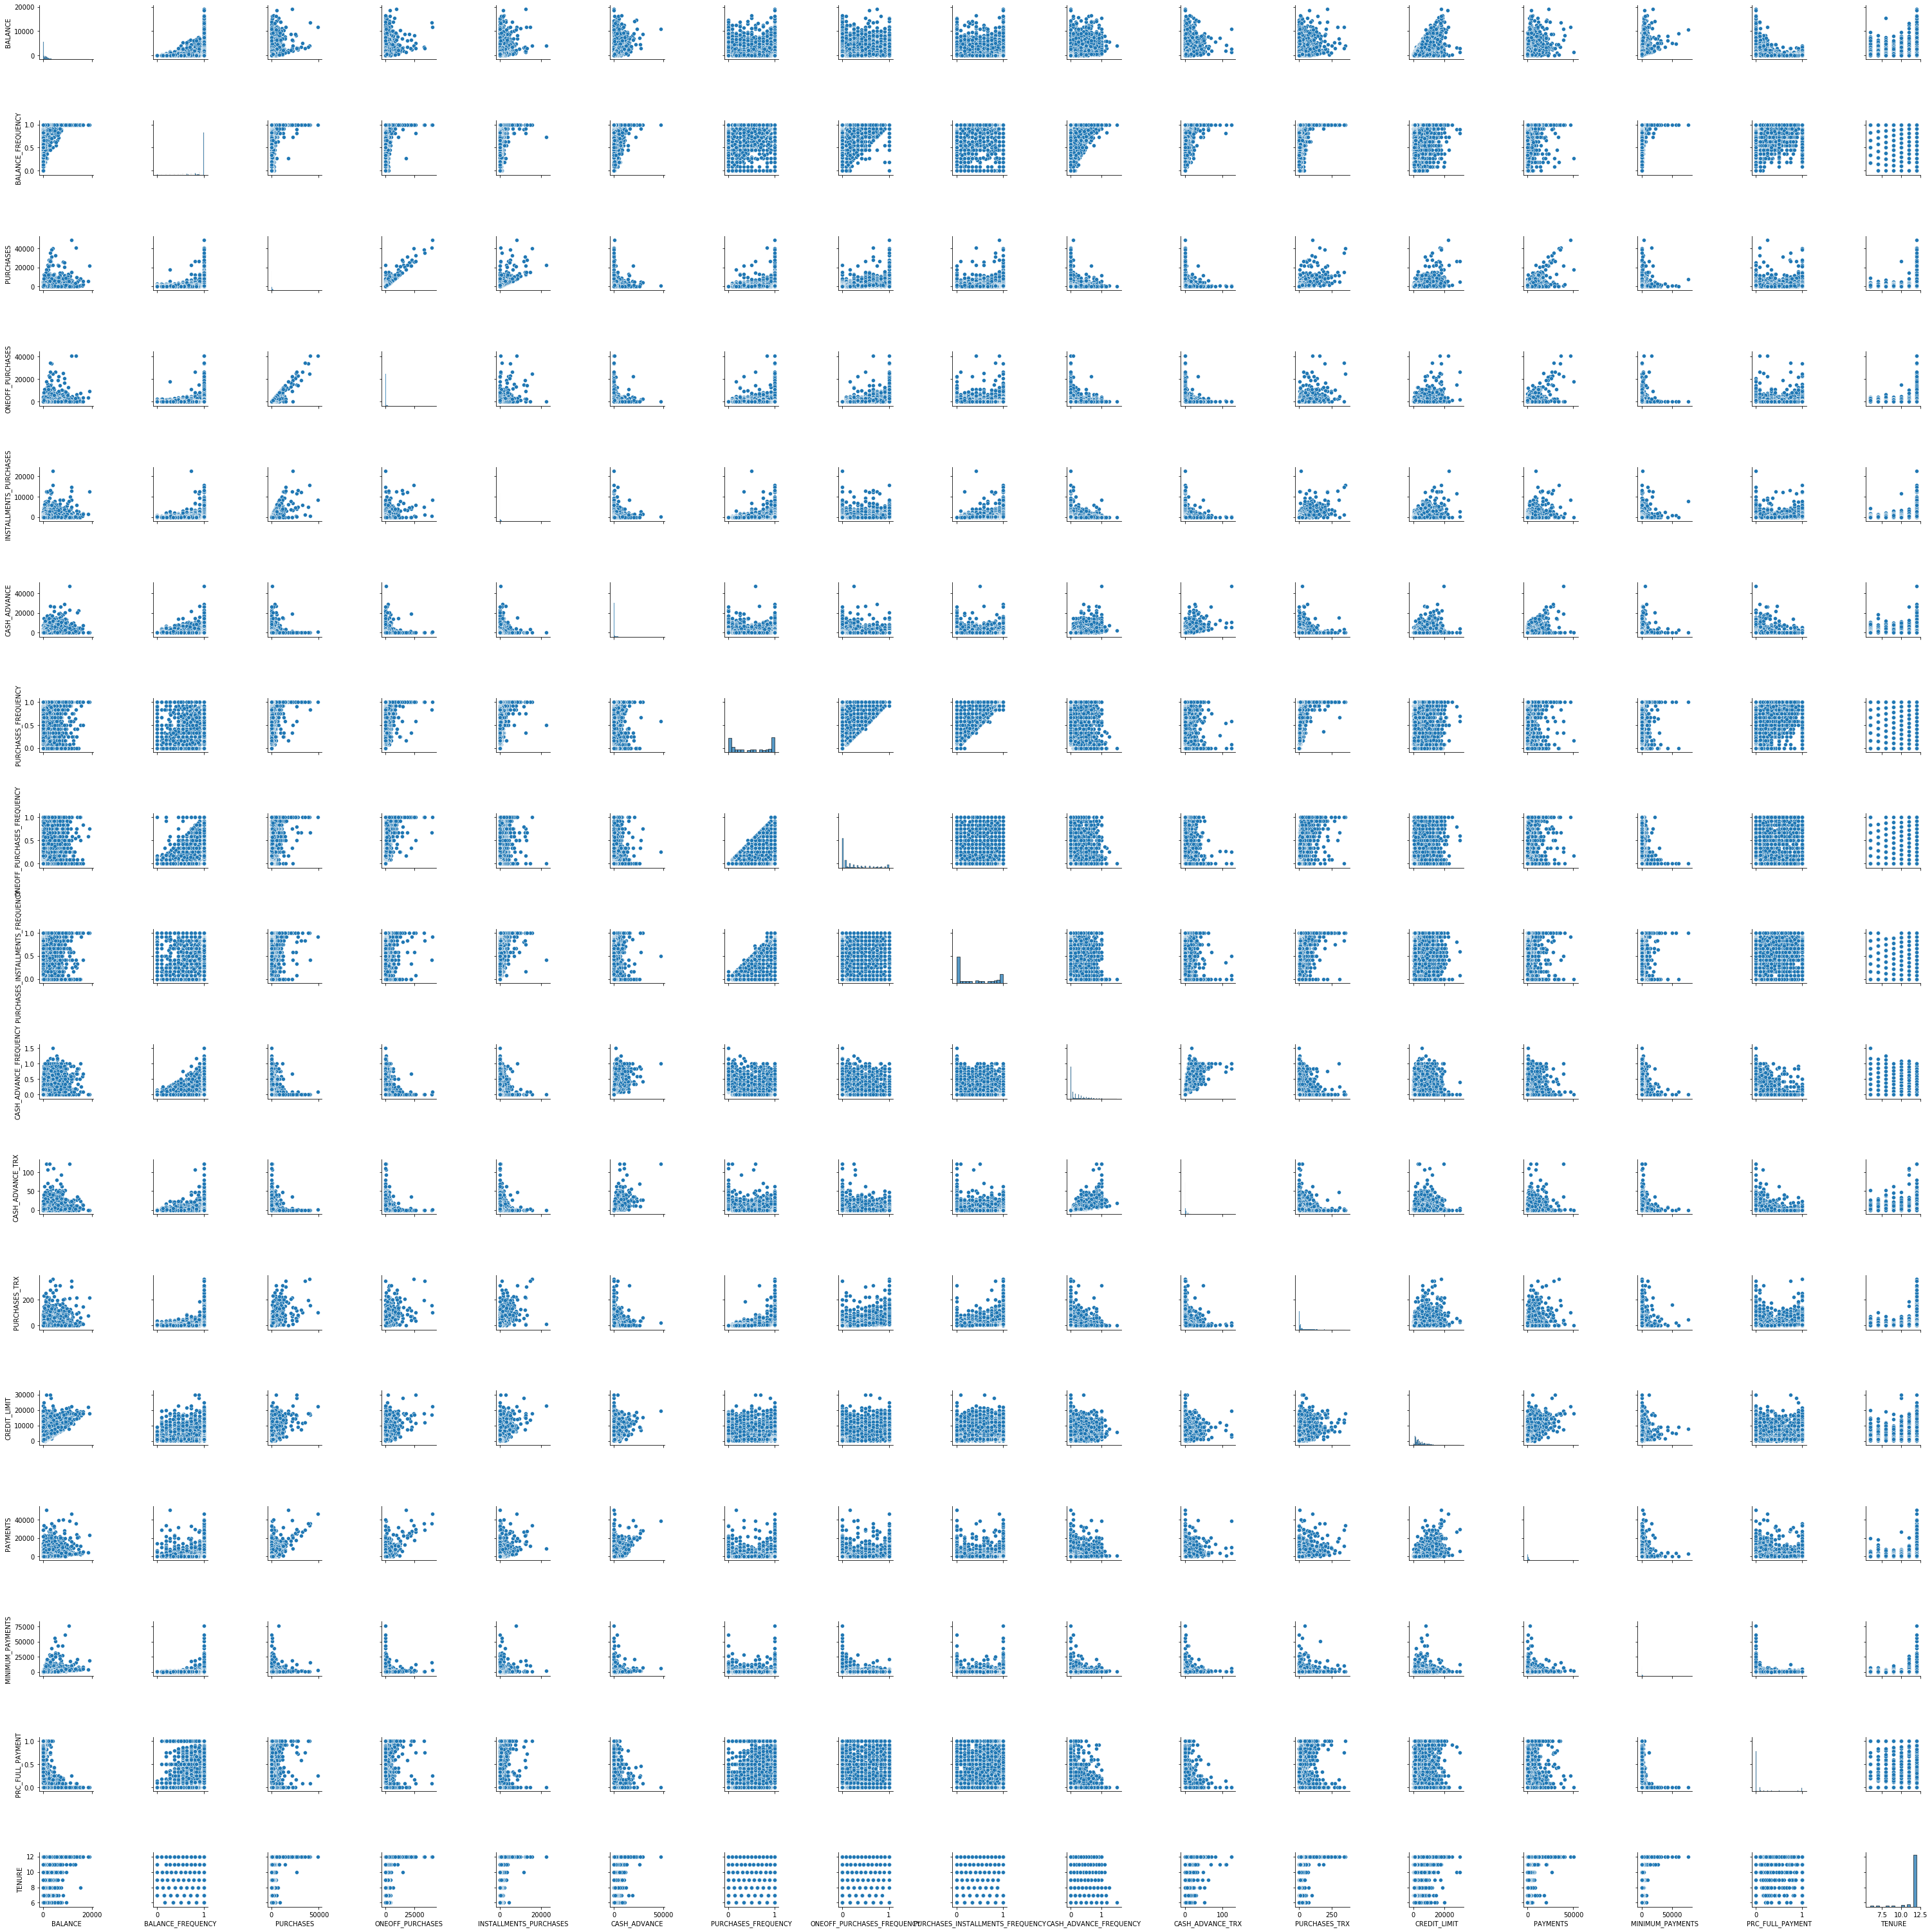

In [152]:
sns.pairplot(df)

#### Correlation Matrix Observations
- The **heatmap** reveals strong correlations between:
  - **PURCASES_TRX AND PURCHASES**: As very obvious, higher the number of purchase transactions imply higher amount spent in purchases.
  Similarly, another strong positive correlations between other obvious positive relationships, like CASH_ADVANCE and CASH_ADVANCE_TRX.
  - **BALANCE and CASH_ADVANCE**: Customers who rely on cash advances tend to have higher balances.
  - **PURCHASES and ONEOFF_PURCHASES**: Higher purchases are often driven by one-off transactions.

#### Pairplot Observations
- The scatter plots show different spending behaviors:
  - Some customers make large one-time purchases, while others prefer installment purchases.
  - The **distribution of CREDIT_LIMIT** is right-skewed, meaning most customers have lower limits but a few have very high limits.
  - **CASH_ADVANCE usage varies significantly**, with many customers never using it, while a few rely heavily on it.


## PCA: 

### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and data analysis. It helps in transforming a dataset with many variables into a smaller set of new variables called **principal components** while preserving as much information (variance) as possible.

### How PCA Works:
1. **Standardize the Data**: Since PCA is affected by the scale of data, the dataset is standardized.
2. **Compute the Covariance Matrix**: This captures the relationships between variables.
3. **Compute Eigenvalues and Eigenvectors**: These are used to identify principal components.
4. **Select the Top Components**: The components that explain the most variance are selected.
5. **Transform the Data**: The dataset is projected onto the selected principal components.

### Why Use PCA for Customer Segmentation?
- Reduces **dimensionality**, making clustering more efficient.
- Helps in **visualizing high-dimensional data**.
- Removes **noise and redundancy**, improving clustering accuracy.
- Identifies **key patterns in customer spending behavior**.



In [12]:
# scaling the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print(pd.DataFrame(df_scaled).head)


<bound method NDFrame.head of              0         1         2         3         4         5         6  \
0     0.002148  0.818182  0.001945  0.000000  0.004240  0.000000  0.166667   
1     0.168169  0.909091  0.000000  0.000000  0.000000  0.136685  0.000000   
2     0.131026  1.000000  0.015766  0.018968  0.000000  0.000000  1.000000   
3     0.087521  0.636364  0.030567  0.036775  0.000000  0.004366  0.083333   
4     0.042940  1.000000  0.000326  0.000393  0.000000  0.000000  0.083333   
...        ...       ...       ...       ...       ...       ...       ...   
8945  0.001496  1.000000  0.005936  0.000000  0.012939  0.000000  1.000000   
8946  0.001007  1.000000  0.006118  0.000000  0.013333  0.000000  1.000000   
8947  0.001229  0.833333  0.002945  0.000000  0.006418  0.000000  0.833333   
8948  0.000707  0.833333  0.000000  0.000000  0.000000  0.000776  0.000000   
8949  0.019572  0.666667  0.022293  0.026821  0.000000  0.002695  0.666667   

             7         8         

In [13]:
# Initializing and fitting PCA, without specifying the number of components
 
pca = PCA()
pca_components = pca.fit_transform(df_scaled)


In [14]:
pca_components.shape

(8950, 17)

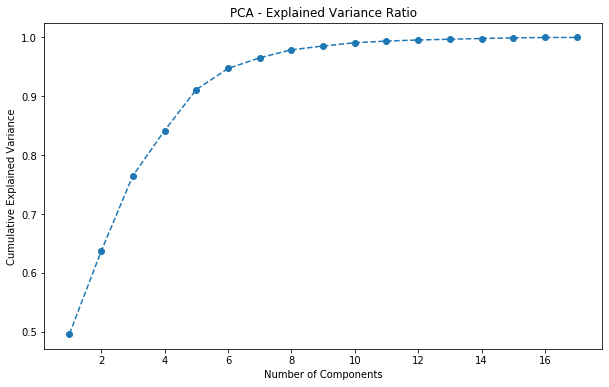

In [15]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance Ratio")
plt.show()

In [16]:
# printing the explained variance ratios
print("Explained variance ratios: ")
print(explained_variance)

Explained variance ratios: 
[0.49597096 0.63651215 0.76495822 0.84172674 0.91136225 0.94724536
 0.96543793 0.97896669 0.98552154 0.9910304  0.99387161 0.99573003
 0.99699706 0.99822282 0.99927985 0.99999997 1.        ]


In [17]:
n_components = np.argmax(explained_variance >= 0.95) + 1

'''
Since np.argmax returns the index of the first occurrence 
where cumulative variance exceeds 95%, 
adding 1 converts this zero-based index into a count of components.
'''

print(f"Number of components selected: {n_components}")


Number of components selected: 7


In [18]:
# saving the transformed PCA with set n_components keeping 95% of the variance.
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)
len(df_pca)

8950

In [19]:
df_pca.shape
# This shape is different from the pca_components, the previously 
# fitted pca model which had 17 columns, that it retained 17 features, 
# however, we only need 95% of the information, so 7 features are ideal.

(8950, 7)

In [20]:
feat_names = df.columns
print(pd.DataFrame(pca.components_.T,  index = feat_names))
# This shows the contribution of each individual feature to the pc component 1 
# and pc component 2

                                         0         1         2         3  \
BALANCE                          -0.015029  0.098820 -0.161162 -0.053842   
BALANCE_FREQUENCY                 0.101779  0.266311 -0.374187 -0.421300   
PURCHASES                         0.032821  0.047628  0.010050 -0.001050   
ONEOFF_PURCHASES                  0.019989  0.058497  0.015015  0.004731   
INSTALLMENTS_PURCHASES            0.035333 -0.002199 -0.005297 -0.010865   
CASH_ADVANCE                     -0.016895  0.013365 -0.026813 -0.005121   
PURCHASES_FREQUENCY               0.685500  0.080517 -0.047218  0.147337   
ONEOFF_PURCHASES_FREQUENCY        0.242632  0.822751  0.168952  0.192683   
PURCHASES_INSTALLMENTS_FREQUENCY  0.637189 -0.423193 -0.225982 -0.013870   
CASH_ADVANCE_FREQUENCY           -0.074094  0.055930 -0.123697  0.004983   
CASH_ADVANCE_TRX                 -0.020311  0.019340 -0.039810 -0.009762   
PURCHASES_TRX                     0.074892  0.063650 -0.008875  0.002285   
CREDIT_LIMIT

**n_components**

- If we set n_components=7, the PCA model will compute 7 principal components, each representing a combination of the original features.
- These components together will explain at least 95% of the variance (assuming we set n_components based on explained variance).

In the first step, we applied PCA without specifying the number of components. This allowed us to analyze the explained variance ratio for each principal component.
Using the cumulative explained variance, I identified the number of principal components required to retain 95% of the variance in the dataset.


After determining the optimal number of components, I reapplied PCA with n_components set to retain 95% of the variance. The transformed dataset is stored in a new dataframe, reducing dimensionality while preserving the most important information.

## CLustering

In [21]:
# Creating atleast 12 different clustering models
models = {
    "KMeans_3": KMeans(n_clusters=3, random_state=42),
    "KMeans_4": KMeans(n_clusters=4, random_state=42),
    "KMeans_5": KMeans(n_clusters=5, random_state=42),
    "KMeans_6": KMeans(n_clusters=6, random_state=42),
    "KMeans_7": KMeans(n_clusters=7, random_state=42),
    "KMeans_8": KMeans(n_clusters=8, random_state=42),
    "KMeans_9": KMeans(n_clusters=9, random_state=42),
    "KMeans_10": KMeans(n_clusters=10, random_state=42),
    "Agglomerative_3": AgglomerativeClustering(n_clusters=3),
    "Agglomerative_4": AgglomerativeClustering(n_clusters=4),
    "Agglomerative_5": AgglomerativeClustering(n_clusters=5),
    "DBSCAN_0.5": DBSCAN(eps=0.5, min_samples=5),
    "DBSCAN_0.3": DBSCAN(eps=0.3, min_samples=5),
    "DBSCAN_3": DBSCAN(eps=0.7, min_samples=10)
}

In [22]:
silhouette_scores = {}
for name, model in models.items():
    labels = model.fit_predict(df_pca)
    if len(set(labels)) > 1:  # Silhouette score not defined for 1 cluster
        score = silhouette_score(df_pca, labels)
        silhouette_scores[name] = score
    else:
        silhouette_scores[name] = None


c:\Users\gilld\anaconda3\envs\NN\lib\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
c:\Users\gilld\anaconda3\envs\NN\lib\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
c:\Users\gilld\anaconda3\envs\NN\lib\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
c:\Users\gilld\anaconda3\envs\NN\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
c:\Users\gilld\anaconda3\envs\NN\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: di

In [23]:
print("Silhouette Scores:")
for model, score in silhouette_scores.items():
    print(f"{model}: {score}")


Silhouette Scores:
KMeans_3: 0.3837177491811264
KMeans_4: 0.33615319924986115
KMeans_5: 0.3362522807648413
KMeans_6: 0.3515396116467381
KMeans_7: 0.3285400003330662
KMeans_8: 0.33844920536105677
KMeans_9: 0.347146948837848
KMeans_10: 0.3626555563044691
Agglomerative_3: 0.30925687626696885
Agglomerative_4: 0.26257947272123805
Agglomerative_5: 0.23166627201705742
DBSCAN_0.5: 0.31843503710980925
DBSCAN_0.3: 0.06787882762211474
DBSCAN_3: None


For each cluster, after having calculated the silhouette scores, I find that the silhouette score for k_means = 3 is maximum, also I find that DBSCAN_3 = None, as the higher number of min_samples make the model just pick only one cluster that is the entire dataset is clustered as just one cluster.

In [24]:
best_model = 'KMeans_3'
print(f"Best clustering model: {best_model}")


Best clustering model: KMeans_3


### Justification for Choosing KMeans_3
The **KMeans_3** model had the highest silhouette score, indicating that it produced the most well-defined clusters. Given our objective of customer segmentation for marketing strategy, using **3 clusters** makes practical sense:
- It provides a balance between simplicity and granularity.
- It allows for distinct customer groups that can be targeted with different marketing approaches. As it is not financially appropriate for a company to to include more marketing strategies just to satisfy its need for customer segmentation.
- Higher values of k did not significantly improve clustering quality, and lower values resulted in poor differentiation.


Moreover, it also helped in:

### **1. Business Interpretability**  
The primary goal of this clustering analysis is to help the marketing team segment customers effectively. Having too many clusters (such as in KMeans_4 or higher) might make it harder to differentiate and target customers efficiently.  
By choosing three distinct customer segments, we can create meaningful groupings such as:  
- **Low Spenders**: Customers with minimal credit card usage.  
- **Moderate Spenders**: Customers with average spending and repayment habits.  
- **High Spenders/VIPs**: Customers with high transactions and credit usage.  

These segments allow for better marketing strategies that are easy to implement and understand.  

### **2. Simplicity & Generalization**  
- A lower number of clusters generally leads to better generalization and less risk of overfitting.  
- Increasing the number of clusters (e.g., `KMeans_4` or `KMeans_5`) may overcomplicate the segmentation, leading to artificial splits in similar customer groups.  

### **3. Visual Clarity (PCA Scatter Plot Analysis)**  
- When visualizing the clusters using PCA, `KMeans_3` shows clearer separation between the groups.  
- More clusters (e.g., `KMeans_4` or higher) tend to reduce the interpretability of the visualization by introducing unnecessary fragmentation.  

### **4. Stability in Clustering**  
- Sometimes, adding extra clusters does not provide meaningful separation—it simply breaks a larger group into smaller, less significant subgroups.  
- If KMeans_4 or higher KMeans produces a cluster with very few customers, it might not be practically useful for marketing purposes.  

### **5. Close Enough Silhouette Score**  
- The silhouette score for KMeans_3 is reasonably higher, meaning the difference in clustering quality is not substantial.    
  
KMeans_3 is the more interpretable and actionable choice for the marketing team. It provides a clear segmentation of customer types, avoids overfitting, and ensures that each cluster has a meaningful size for targeted marketing campaigns.  


**Comparison with Assignment 2**

When compared with the best model from assignement 2, I fond that the model performance significantly improved as the model selected (agglomerative clustering) in asg_2 could achieve not achieve the maximum sihouette score of 0.38 as kmeans could do here,

Moreover, as I selected a kmeans here, I did not use kmeans in my previous assignment, so I find that would be inappropriate between two different types of models.

However, the one thing to be noted is that even of I would have used kmeans for my previous, it would not achieved a high score as by analyzing the silhouette scores from this assignment and the previous one, I determine that PCA improved clustering performance by reducing noise and redundancy as the number of features used here are equal=7 covering 95% of the variance in the data.


# Conclusions

Scattering the first two columns of the transformed data using the best model-kmeans3

In [25]:

best_labels = models[best_model].fit_predict(df_pca)

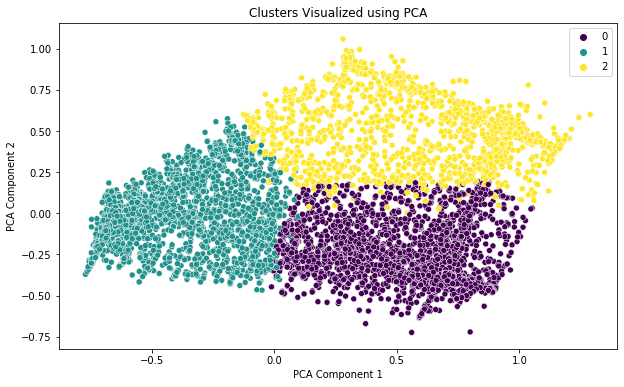

In [166]:

best_labels = models[best_model].fit_predict(df_pca)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=best_labels, palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters Visualized using PCA")
plt.show()

**Comments on the plot**

The scatter plot shows well separated clusters, which is better than the clusters formed in group assignment 2, in which i used a hierarchical model (agglomerative clustering). It is better because in second assignment the plots were not well separated amongst the clusters, due to which the best model could not be inferred.

Since we used PCA transformation, which caused the clusters become more distinct, as it reduced the number of features to 7, which were earlier almost double than what it is now.

In conclusion, PCA played an important role in clarifying the relationships among data points, which resulted in well-formed clusters and improved visualizations.




**Why do we need well-separated clusters**

*Cluster Interpretability*: Well-separated clusters make it easier to interpret the results. When clusters are distinct, each group represents unique patterns or characteristics in the data. This allows us to draw more meaningful and accurate insights about each cluster.

*Model Quality*: Clear separation between clusters often indicates that the clustering algorithm has done a good job. Overlapping clusters might mean that the algorithm struggled to distinguish groups or that the chosen features or number of clusters were not optimal.

*Reduced Ambiguity*: In poorly separated clusters, data points near the boundaries can lead to ambiguity, making it harder to assign them confidently to a specific cluster. This can affect the reliability and trustworthiness of the clustering results.

*Downstream Applications*: Well-separated clusters are crucial for tasks like targeted marketing, anomaly detection, or medical diagnosis, where cluster membership can directly influence decision-making. Poorly separated clusters can lead to incorrect decisions and reduce the effectiveness of such applications.

*Validation*: Metrics used to validate clustering results, like the Silhouette Score, Dunn Index, or Davies-Bouldin Index, rely on intra-cluster compactness and inter-cluster separation. Well-separated clusters often score higher on these metrics, indicating better performance.

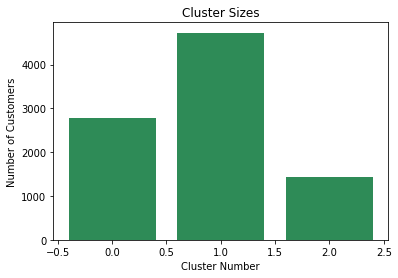

In [26]:
unique, counts = np.unique(best_labels, return_counts=True)
plt.bar(unique, counts, color='seagreen')
plt.xlabel("Cluster Number")
plt.ylabel("Number of Customers")
plt.title("Cluster Sizes")
plt.show()

### Discussion of histogram

As already seen in the plot, there are three clusters made by our model contaning significant values, as we notice that one of the clusters has comparitively larger values than the others it indicates that most of the (same as in real life) customers have same behavior. For example, a middle class family members will all have their budget limits, they purchasing/spending behavior restricted by their family's yearly income.

In [27]:
# Creating a separate dataframe for each cluster

for cluster in np.unique(best_labels):
    cluster_data = df[best_labels == cluster]
    print(f"Cluster {cluster} Statistics:")
    print(cluster_data.describe())


Cluster 0 Statistics:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   2786.000000        2786.000000   2786.000000       2786.000000   
mean    1138.840613           0.914410   1076.213112        275.007943   
std     1807.093596           0.190398   1262.707218        601.840674   
min        0.000000           0.000000     12.000000          0.000000   
25%       58.855452           0.909091    336.000000          0.000000   
50%      340.657756           1.000000    638.025000          0.000000   
75%     1412.701811           1.000000   1348.235000        270.272500   
max    16115.596400           1.000000  14686.100000       6345.650000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             2786.000000   2786.000000          2786.000000   
mean               801.848844    502.190212             0.871642   
std                941.070058   1483.401147             0.161024   
min                 12.000000      0.00

#### Describing each group of customers to marketing strategy team

### Cluster 0

**Customer Profile**:

- These customers frequently make purchases (high PURCHASES_FREQUENCY = 0.87), primarily through installments rather than one-time payments.
- They have moderate to high balances (mean BALANCE ≈ 1138) but tend to avoid cash advances (CASH_ADVANCE_FREQUENCY = 0.07, very low).
- Their credit limits are moderate (CREDIT_LIMIT ≈ 3939), indicating they are neither high-risk nor premium customers.
- They have low full payment behavior (PRC_FULL_PAYMENT ≈ 0.24), suggesting they often carry balances but are not heavy revolvers.

**Marketing Strategy Recommendations**:

Promote installment-based offers: Since this group prefers installment purchases (their purchase installmets frequency = 0.82), marketing efforts should focus on low-interest EMI (Equated Monthly Installment) options, cashback on installment payments, and flexible repayment plans.

Encourage full payment: Since many don’t fully pay their balances as their mean balance is always high, rewards for full balance payments or lower interest rates for early payments could increase engagement.

Loyalty-based rewards: Since they frequently use their cards and their tenure with the bank is high(=11.4), point-based reward programs on installment transactions can encourage continued usage.


### Cluster 1

**Customer Profile**:

- This group relies heavily on cash advances (CASH_ADVANCE ≈ 1356, much higher than other clusters), with a high frequency of cash withdrawals (CASH_ADVANCE_FREQUENCY ≈ 0.18).
- They have a high average balance (BALANCE ≈ 1705) but make fewer purchases (PURCHASES_FREQUENCY ≈ 0.14), suggesting they primarily use their credit cards for withdrawing cash rather than shopping.
- Their one-time purchases are occasional (ONEOFF_PURCHASES_FREQUENCY ≈ 0.08), and they almost never use installments (PURCHASES_INSTALLMENTS_FREQUENCY ≈ 0.06).
- They have moderate credit limits (CREDIT_LIMIT ≈ 4145), which might be adjusted based on their cash advance behavior.
- Their payment behavior is inconsistent, with low full payment rates (PRC_FULL_PAYMENT ≈ 0.07), meaning they likely carry over balances and pay interest.


**Marketing Strategy Recommendations**:

Offer lower interest rates on purchases: Since they rely on cash advances, encouraging card-based transactions by reducing interest rates on direct purchases can shift their spending habits.

Introduce emergency credit solutions: Since they use cash advances frequently, targeted short-term credit options or flexible credit line increases could cater to their needs.

Debt management programs: Given their tendency to carry balances, financial wellness programs, installment conversion options for cash advances, and debt consolidation offers could help them manage their finances better.

### Cluster 2

**Customer Profile**:

- This cluster consists of frequent and high-value spenders, with a high purchase frequency (PURCHASES_FREQUENCY ≈ 0.89).
- They make large one-time purchases (ONEOFF_PURCHASES ≈ 2392) but also use installments (INSTALLMENTS_PURCHASES ≈ 798).
- They have high overall purchases (PURCHASES ≈ 3189), suggesting active card usage for shopping, travel, and lifestyle expenses.
- Their cash advance usage is relatively low (CASH_ADVANCE ≈ 660), meaning they primarily use their cards for direct purchases rather than withdrawing cash.
- High credit limits (CREDIT_LIMIT ≈ 6718) and larger payments (PAYMENTS ≈ 3217) indicate financial stability.
- Good repayment behavior, with a moderate rate of full balance payments (PRC_FULL_PAYMENT ≈ 0.27).

**Marketing Strategy Recommendations**:

Premium rewards and cashback programs: Since they spend a lot, cashback on purchases, bonus reward points, or exclusive discounts can increase loyalty.
Installment plan promotions: Since they already use installment payments, offering 0% interest installment plans for big purchases can encourage more spending.

Exclusive lifestyle benefits: Given their high spending behavior, they may respond well to VIP travel perks, concierge services, and luxury brand discounts.

Encourage full payments: Since their full-payment percentage is moderate, offering incentives for full balance payments (e.g., extra reward points) can help in reducing interest burdens while increasing engagement.


By using these strategies, the marketing team can keep their customers with them for a longer period of time.

This is simply be stated as:

### Cluster 0: Regular shoppers

### Cluster 1: Ones who rarely use their cards for shopping but instead to withdraw money.

### Cluster 2: High spending, high usage of cards for shopping

<Figure size 864x576 with 0 Axes>

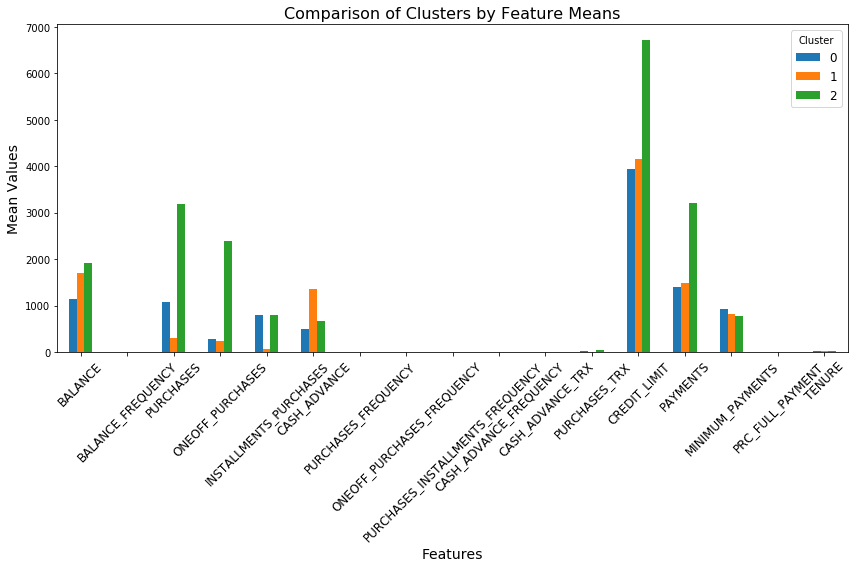

In [ ]:
# Computing mean values for each cluster
cluster_means = df.groupby(best_labels).mean()

# Transposing the data for easier plotting
cluster_means_transposed = cluster_means.T

# Plotting the comparison
plt.figure(figsize=(12, 8))

# Creating a bar chart for cluster comparison
cluster_means_transposed.plot(kind='bar', figsize=(12, 8))

# Adding titles and labels
plt.title('Comparison of Clusters by Feature Means', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mean Values', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.xticks(rotation=45, fontsize=12)

# Showing the plot
plt.tight_layout()

Comparing the clusters, I notice that the purchase transactions are maximum for the customers in Cluster 2, and minimum for the customers in Cluster 0; 
Then, the credit limit is maximum for the customers in Cluster 2 as well while it is minimum for the customers in CLuster 0, 
Moreover, balance frequency purchases are even higher for the cluster 2 customers, along with the oneoff purchases, 
Similarly, is the case for balance where the average balance carried by the customers in Cluster 2 is maximum while it is minimum for the customers in CLuster 0, 
The only place where we find the the mean values of customers of CLuster 2 is in the case of Installment purchases, that is they do not prefer making installment purchases.